Saving archive.zip to archive (1).zip
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
✅ Accuracy: 0.84
✅ Precision: 0.26
✅ Recall: 0.13


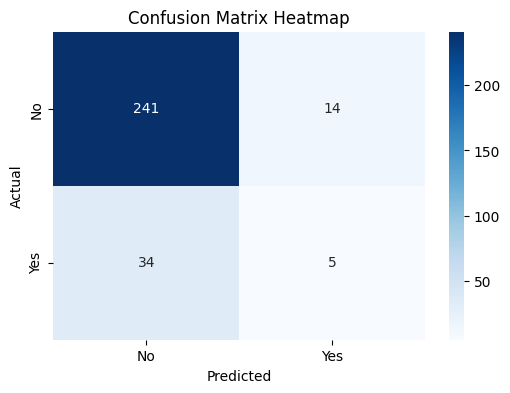

In [7]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Replace with your exact filename if needed
df = pd.read_csv("6. Predict Employee Attrition.csv")

# Preview data
df.head()
print(df.columns)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Drop any rows with missing data
df = df.dropna()

# Set features and target
features = ['JobSatisfaction', 'YearsAtCompany', 'MonthlyIncome', 'WorkLifeBalance']
target = 'Attrition'

# Encode categorical features if necessary
for col in features:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

# Encode target column
le_target = LabelEncoder()
df[target] = le_target.fit_transform(df[target])

# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
